<a href="https://colab.research.google.com/github/TOM-BOHN/MsDS-customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.&nbsp;Abstract

# 2.&nbsp;Background

## Context

I spent 7 years working at Salesforce, one of the largest software as a service (SaaS) companies that sells its cloud software on a subscription basesd business model. Several of those years were spent in data vizualization and business analyst roles working with the renewals organization to build and develop data science models focused on customer health and understand the risk of customers leaving the business.

The main driving focus of these projects was to understand the customer and focus on reducing the chances of a customers leaving the subscription based model.  This resulted in a relentless focus on a single KPI, customer attrition (aka customer churn).

In this report, I will play the role of the data science.  Stepping out of my business facing role and working with a similar model that was created to predict customer attrition. While I cannot use propriatary business data for this analysis, I will find and use an publicly availible customer chrun dataset to emulate a similar customer context. I will also use the XGBoosted package that was implemented to create the predicition model.

## Primer on Customer Attrition

## Problem Type and Model

## Dataset Selection

## Objective

# 3.&nbsp;Import Required Libraries

##Python Libraries

In [50]:
# File Connection and File Manipulation
import os
from google.colab import drive
# Basic Data Science Toolkits
import pandas as pd
import numpy as np
import math
import time
# Data Vizualization
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import ticker
import seaborn as sns
# Data Models
import sklearn
from sklearn.ensemble import RandomForestClassifier
# Data Model Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
# Import Data Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer
# Cross Validation, Grid Search, and K-Fold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

## Global Variables

In [151]:
gDEBUG = True
if gDEBUG: print('Debug is set to:', gDEBUG)
gLOD = 2

Debug is set to: True


# 4.&nbsp;Data

## Dataset Source

#### Initial Descriptive Details of Tables

Attribute                 |Details
:-------------------------|:-----------------------------
**Dataset:**              | Telco Customer Churn (11.1.3+)
**Source Type:**         | Public Dataset
**Source Link:**          | https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113
**Source Documentation:** | https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

###About Dataset Provider

The datasource used in this analysis was created by the Sample Team at IBM as part of the the IBM Accelerator Catalog, a free platform created to showcase assets and demonstrate the capabilities of the IBM products. This dataset comses from a subset of this platform focused on IBM Cognos Analytics Sample Data. The datset was package on the Kaggle website and is availible for download through the UI or the Kaggle API.

###About Dataset

Specifically, the **Telco Customer Churn (11.1.3+)** data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index. [2]

## Dataset Details

### Dataset Tables
The dataset is comprised of 5 tables, focused on specific details related to the customer.  The tables are:
- **Demographics** : The **person** conceptual entity including demographic details related to each customers included in the dataset.
- **Location** : The **location** conceptual entity, including location information related to where the customer is located in the world. A less grnular form of address information.
- **Population** : Additional statisticss related to the location entity, including the population of each zipcode included in the dataset.
- **Services** : The **transaction** entity in a summerized format, outlining the services / prducts consumed, actions taken by the customer, and transaction / billing details related to the customers purchase.
- **Status** : Additional derived statistics related to the person entity, including survey details, derived scores, and churn information related to each customer.

### Dataset Relationships

The **Services** table is the main fact in the data model.

The following relationships can be used to join the data:
- **Services** joined to **Demographics** joined on CustomerID = CustomerID
- **Services** joined to **Status** joined on CustomerID = CustomerID
- **Demographics** joined to **Location** joined on CustomerID = CustomerID
- **Location** joined to **Population** joined on ZipCode = ZipCode

## Dataset Dictionary

Datails on each field in the original dataset can be found in the following data dictionary.

###Demographics
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Gender**: The customer's gender: Male, Female
- **Age**: The customer's current age, in years, at the time the fiscal quarter ended.
- **Senior Citizen**: Indicates if the customer is 65 or older: Yes, No
- **Married**: Indicates if the customer is married: Yes, No
- **Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- **Number of Dependents**: Indicates the number of dependents that live with the customer.

### Location
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Country**: The country of the customer's primary residence.
- **State**: The state of the customer's primary residence.
- **City**: The city of the customer's primary residence.
- **Zip Code**: The zip code of the customer's primary residence.
- **Lat Long**: The combined latitude and longitude of the customer's primary residence.
- **Latitude**: The latitude of the customer's primary residence.
- **Longitude**: The longitude of the customer's primary residence.

###Population
- **ID**: A unique ID that identifies each row.
- **Zip Code**: The zip code of the customer's primary residence.
- **Population**: A current population estimate for the entire Zip Code area.

###Services
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter**: The fiscal quarter that the data has been derived from (e.g. Q3).
- **Referred a Friend**: Indicates if the customer has ever referred a friend or family member to this company: Yes, No
- **Number of Referrals**: Indicates the number of referrals to date that the customer has made.
- **Tenure in Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- **Offer**: Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.
- **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No
- **Avg Monthly Long Distance Charges**: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
- **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- **Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- **Avg Monthly GB Download**: Indicates the customer's average download volume in gigabytes, calculated to the end of the quarter specified above.
- **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- **Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- **Device Protection Plan**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- **Premium Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- **Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Music**: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Unlimited Data**: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No
- **Contract**: Indicates the customer's current contract type: Month-to-Month, One Year, Two Year.
- **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No
- **Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- **Monthly Charge**: Indicates the customer's current total monthly charge for all their services from the company.
- **Total Charges**: Indicates the customer's total charges, calculated to the end of the quarter specified above.
- **Total Refunds**: Indicates the customer's total refunds, calculated to the end of the quarter specified above.
- **Total Extra Data Charges**: Indicates the customer's total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
- **Total Long Distance Charges**: Indicates the customer's total charges for long distance above those specified in their plan, by the end of the quarter specified above.

### Status
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter**: The fiscal quarter that the data has been derived from (e.g. Q3).
- **Satisfaction Score**: A customer's overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).
- **Satisfaction Score Label**: Indicates the text version of the score (1-5) as a text string.
- **Customer Status**: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined
- **Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- **Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
- **Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- **Churn Score Category**: A calculation that assigns a Churn Score to one of the following categories: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, and 91-100
- **CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- **CLTV Category**: A calculation that assigns a CLTV value to one of the following categories: 2000-2500, 2501-3000, 3001-3500, 3501-4000, 4001-4500, 4501-5000, 5001-5500, 5501-6000, 6001-6500, and 6501-7000.
- **Churn Category**: A high-level category for the customer's reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. When they leave the company, all customers are asked about their reasons for leaving. Directly related to Churn Reason.
- **Churn Reason**: A customer's specific reason for leaving the company. Directly related to Churn Category.

## Import Dataset to Notebook

### Connect to Kaggle API

In [119]:
#Prepare to Connect to Kaggle API with Token

#Create a Kaggle API Token
#- Log into your kaggle account, navigate to theAPI section
#- Create a New API Token, triggering the downloaf of the kaggle.json file
#- Go to this Google Colab Notebook step and proceed

#Mount the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

#from google.colab import files
#files.upload()
#prompt open to upload kaggle.json

source_filepath = '/content/gdrive/MyDrive/Colab_files/kaggle.json'
destination_filepath = '/content'
!cp {source_filepath} {destination_filepath}

#Verify the kaggle.json file is present
!ls -lha kaggle.json

#Install kaggle API
!pip install -q kaggle

#Move kaggle.json file to the appropriate directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

#check the directory before downloading the datasets
!pwd

#Sanity Check for Connection
#!kaggle datasets list

### Import Dataset from Kaggle

In [121]:
#Import the Kaggle Data Source
#Define the source of the dataset
kaggle_owner_name = 'ylchang'
kaggle_dataset_name = 'telco-customer-churn-1113'
kaggle_dataset = kaggle_owner_name + '/' + kaggle_dataset_name
print(kaggle_dataset)

#Define the destination of the dataset
dest_path = '/content'
dest_folder = ''
dest_dataset = dest_path + dest_folder
print(dest_dataset)

#Download the kaggle dataset
!kaggle datasets download -d {kaggle_dataset} -p {dest_dataset}

#Unzip the files
zip_file_name = kaggle_dataset_name + '.zip'
!mkdir {kaggle_dataset_name}
print(zip_file_name)
!unzip -o {zip_file_name} -d {kaggle_dataset_name}

Reference for Connecting to Kaggle

*   Steps to download Kaggle datasets in Google Colab: https://www.kaggle.com/discussions/general/156610
*   Easy way to use Kaggle datasets in Google Colab: https://www.kaggle.com/discussions/general/51898
*   Easiest way to download kaggle data in Google Colab: https://www.kaggle.com/discussions/general/74235

## Pre-Processing

#### Covert Files to Dataframes

In [123]:
def get_dataset_filenames(dest_dataset, kaggle_dataset_name):
  import os
  #Get the list of files imported
  directory_path = dest_dataset + '/' + kaggle_dataset_name
  directory_files = os.listdir(directory_path)
  print(directory_files)
  return directory_files

In [124]:
# Create a dictonary to store the datafames imported
def create_dict_of_dataframes(directory_files):
  df_dict = {}

  for file in directory_files:
    dataset_file = dest_dataset + '/' + kaggle_dataset_name + '/' + file
    df_dict[file] = pd.read_excel(dataset_file)
    print("key: ", file)
    #print(df_dict[file], "\n")
  return df_dict

In [232]:
directory_files =  get_dataset_filenames(dest_dataset, kaggle_dataset_name)
df_dict = create_dict_of_dataframes(directory_files)

['Telco_customer_churn_demographics.xlsx', 'Telco_customer_churn_services.xlsx', 'Telco_customer_churn_location.xlsx', 'Telco_customer_churn.xlsx', 'Telco_customer_churn_population.xlsx', 'Telco_customer_churn_status.xlsx']
key:  Telco_customer_churn_demographics.xlsx
key:  Telco_customer_churn_services.xlsx
key:  Telco_customer_churn_location.xlsx
key:  Telco_customer_churn.xlsx
key:  Telco_customer_churn_population.xlsx
key:  Telco_customer_churn_status.xlsx


####Drop Unneccisary Fields

In [233]:
def quick_table_details (df_name, df, level_of_detail = 10):
  if level_of_detail >= 1:
    print('\n####', df_name, '####')
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    print('number of features (columns) = ' + str(num_cols))
    print('number of observations (rows) = ' + str(num_rows))
    print('----------------------------')
  if level_of_detail >= 2:
    print(df.dtypes.value_counts())
    print('----------------------------')
  if level_of_detail >= 3:
    print(df.columns)
    print('----------------------------')
  #if level_of_detail >= 4:
    #print(df.count)
    #print(df.max)
    #print(df.min)
    #print(df.shape)
    #print(df.describe)

In [234]:
LOD = gLOD
for df_name, df in df_dict.items():
  quick_table_details(df_name, df, LOD)


#### Telco_customer_churn_demographics.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object    6
int64     3
dtype: int64
----------------------------

#### Telco_customer_churn_services.xlsx ####
number of features (columns) = 30
number of observations (rows) = 7043
----------------------------
object     19
float64     6
int64       5
dtype: int64
----------------------------

#### Telco_customer_churn_location.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object     5
int64      2
float64    2
dtype: int64
----------------------------

#### Telco_customer_churn.xlsx ####
number of features (columns) = 33
number of observations (rows) = 7043
----------------------------
object     24
int64       6
float64     3
dtype: int64
----------------------------

#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 3
number of observations (row

In [235]:
def pre_process_drop_fields(df_name, df, fields_to_drop, LOD = 10):
  quick_table_details(df_name, df, LOD)
  #Drop fields not useful to the predictive model
  print('Executing the drop process:')
  for field in fields_to_drop:
    if field in df.columns:
      df = df.drop(field, axis=1)
      print('\n', '[-]', 'field =', field, 'dropped.')
    else:
      print('\n', '[!]', 'field =', field, 'is not in the DataFrame.')
  # Display a summary of table statistics
  quick_table_details(df_name, df ,LOD)
  if LOD >= 3: print('\n', df.describe(include='all'), '\n')
  return df

In [236]:
def create_pp_fields_to_drop():
  dict_ftd = {'df_name' : [],
                        'fields_to_drop' : []
                        }
  dict_ftd['df_name'].append('Telco_customer_churn_population.xlsx')
  dict_ftd['fields_to_drop'].append(['ID'])
  dict_ftd['df_name'].append('Telco_customer_churn_location.xlsx')
  dict_ftd['fields_to_drop'].append(['Count', 'Lat Long', 'Latitude', 'Longitude'])
  dict_ftd['df_name'].append('Telco_customer_churn_demographics.xlsx')
  dict_ftd['fields_to_drop'].append(['Count'])
  dict_ftd['df_name'].append('Telco_customer_churn_services.xlsx')
  dict_ftd['fields_to_drop'].append(['Count', 'Quarter'])
  dict_ftd['df_name'].append('Telco_customer_churn_status.xlsx')
  dict_ftd['fields_to_drop'].append(['Count', 'Quarter'])

  return dict_ftd

In [237]:
dict_fields_to_drop = create_pp_fields_to_drop()
LOD = 1

print('Fields to Drop in Pre-processing:', '\n', pd.DataFrame(dict_fields_to_drop), '\n')

iter = len(dict_fields_to_drop['df_name'])
for i in range(iter):
  #extract the parameters from the dictionary
  df_name = dict_fields_to_drop['df_name'][i]
  fields_to_drop = dict_fields_to_drop['fields_to_drop'][i]
  #execute the pre-process function
  df_dict[df_name] = pre_process_drop_fields(df_name = df_name, df = df_dict[df_name],
                                          fields_to_drop = fields_to_drop, LOD = LOD)

Fields to Drop in Pre-processing: 
                                   df_name                          fields_to_drop
0    Telco_customer_churn_population.xlsx                                    [ID]
1      Telco_customer_churn_location.xlsx  [Count, Lat Long, Latitude, Longitude]
2  Telco_customer_churn_demographics.xlsx                                 [Count]
3      Telco_customer_churn_services.xlsx                        [Count, Quarter]
4        Telco_customer_churn_status.xlsx                        [Count, Quarter] 


#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 3
number of observations (rows) = 1671
----------------------------
Executing the drop process:

 [-] field = ID dropped.

#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 2
number of observations (rows) = 1671
----------------------------

#### Telco_customer_churn_location.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
------

#### Join and Drop Keys

In [238]:
def create_wide_dataframe(df_dict, LOD):
  df_s = pd.DataFrame(df_dict['Telco_customer_churn_demographics.xlsx'])
  df_s = df_s.merge(df_dict['Telco_customer_churn_location.xlsx'], how='left', on='Customer ID')
  df_s = df_s.merge(df_dict['Telco_customer_churn_population.xlsx'], how='left', on='Zip Code')
  df_s = df_s.merge(df_dict['Telco_customer_churn_services.xlsx'], how='left', on='Customer ID')
  df_s = df_s.merge(df_dict['Telco_customer_churn_status.xlsx'], how='left', on='Customer ID')
  quick_table_details('consolidated data frame', df_s ,LOD)
  return df_s

In [239]:
df_s = create_wide_dataframe(df_dict = df_dict, LOD = gLOD)
if gDEBUG: print('\n', df_s, '\n')
if gDEBUG: print('\n', df_s.describe(include='all'), '\n')


#### consolidated data frame ####
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
object     30
int64      12
float64     6
dtype: int64
----------------------------

      Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  Number of Dependents        Country       State          City  Zip Code  Population Referred a Friend  Number of Referrals  Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines Internet Service Internet Type  Avg Monthly GB Download Online Security Online Backup Device Protection Plan Premium Tech Support Streaming TV Streaming Movies Streaming Music Unlimited Data        Contract Paperless Billing   Payment Method  Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  Satisfaction Score Customer Status Churn Label  Churn Value  Churn Score  CLTV   Churn Category                  Churn Reason
0     

## Summary of Data

### Input Data Descriptive Statistics

In [240]:
quick_table_details('df_s', df_s , gLOD)
print('\n', df_s, '\n')
print('\n', df_s.describe(include='all'), '\n')


#### df_s ####
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
object     30
int64      12
float64     6
dtype: int64
----------------------------

      Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  Number of Dependents        Country       State          City  Zip Code  Population Referred a Friend  Number of Referrals  Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines Internet Service Internet Type  Avg Monthly GB Download Online Security Online Backup Device Protection Plan Premium Tech Support Streaming TV Streaming Movies Streaming Music Unlimited Data        Contract Paperless Billing   Payment Method  Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  Satisfaction Score Customer Status Churn Label  Churn Value  Churn Score  CLTV   Churn Category                  Churn Reason
0     8779-QRDMV    Male 

# 5.&nbsp;Data Clensing

### Preview the Dataset

In [241]:
# preview all columns of the table:
if gDEBUG:
  pd.set_option('display.max_columns', None)
  pd.set_option('display.width', 1000)
  print(df_s.head(5))
else:
  pd.reset_option('display.max_columns')
  pd.reset_option('display.width')
  print(df_s.head(5))

  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  Number of Dependents        Country       State         City  Zip Code  Population Referred a Friend  Number of Referrals  Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines Internet Service Internet Type  Avg Monthly GB Download Online Security Online Backup Device Protection Plan Premium Tech Support Streaming TV Streaming Movies Streaming Music Unlimited Data        Contract Paperless Billing   Payment Method  Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  Satisfaction Score Customer Status Churn Label  Churn Value  Churn Score  CLTV   Churn Category                  Churn Reason
0  8779-QRDMV    Male   78       No            Yes      No         No                     0  United States  California  Los Angeles     90022       68701                No                    0                 1     None            

### Data Type Munging

In [262]:
def dtype_review_update(df, completed_list):
  all_cols = df.columns
  remaining_cols = set(all_cols)
  for i in range(len(completed_list)):
    remaining_cols = remaining_cols - set(completed_list[i])
  remaining_cols = list(remaining_cols)

  #Pritn a summary of columns remaining
  print('There are ', len(remaining_cols), 'columns to still map.')
  print(remaining_cols)
  if gDEBUG: print()
  if gDEBUG: print(df_s.dtypes[remaining_cols])

  return remaining_cols

def explain_dtype_cols(df, data_type):
  print(df.select_dtypes(data_type).info())
  if gDEBUG: print()
  if gDEBUG: print(df.select_dtypes(data_type).describe(include='all'))

def convert_dtype_bool(df, bool_cols, LOD = 10):
  for elt in bool_cols:
    df[elt] = df[elt].map({'Yes':True ,'No':False,
                          'yes':True ,'no':False,
                          True:True ,False:False,})
    df[elt] = df[elt].astype('bool')

  #Summarize changes made
  print('Corrected data type for', len(bool_cols), 'boolean columns.')
  print()
  if LOD >= 2: explain_dtype_cols(df, data_type = 'bool')

  return df

def convert_dtype_basic(df, data_type, col_list, LOD = 10):
  for elt in col_list:
    df[elt] = df[elt].astype(data_type)

  #Summarize changes made
  print('Corrected data type for', len(col_list), '', data_type, 'columns.')
  print()
  if LOD >= 2: explain_dtype_cols(df, data_type = data_type)

  return df

def dtype_update_completed(df, dtype_list, completed_list):
  print('Completed update of data type for', len(df.columns), 'columns.')
  for i in range(len(completed_list)):
      print('-- Corrected or validated data type for', len(completed_list[i]), '', dtype_list[i], 'columns.')
  if gDEBUG: print('')
  if gDEBUG: print(df.info())

In [263]:
# covert to boolean fields
LOD = 2
bool_cols = ['Under 30', 'Married', 'Senior Citizen', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service',
             'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
             'Streaming Music',	'Unlimited Data', 'Paperless Billing', 'Churn Label']

df_s = convert_dtype_bool(df = df_s, bool_cols = bool_cols, LOD = LOD)

Corrected data type for 18 boolean columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Under 30                7043 non-null   bool 
 1   Senior Citizen          7043 non-null   bool 
 2   Married                 7043 non-null   bool 
 3   Dependents              7043 non-null   bool 
 4   Referred a Friend       7043 non-null   bool 
 5   Phone Service           7043 non-null   bool 
 6   Multiple Lines          7043 non-null   bool 
 7   Internet Service        7043 non-null   bool 
 8   Online Security         7043 non-null   bool 
 9   Online Backup           7043 non-null   bool 
 10  Device Protection Plan  7043 non-null   bool 
 11  Premium Tech Support    7043 non-null   bool 
 12  Streaming TV            7043 non-null   bool 
 13  Streaming Movies        7043 non-null   bool 
 14  Streaming Music         704

In [264]:
print(df_s.select_dtypes('int64').columns)
print(df_s.select_dtypes('float64').columns)

Index(['Age', 'Number of Dependents', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly GB Download', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV'], dtype='object')
Index(['Avg Monthly Long Distance Charges', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue'], dtype='object')


In [265]:
# Convert String, Int, and Float fields
str_cols = ['Customer ID']
int_cols = ['CLTV', 'Churn Value', 'Number of Referrals', 'Avg Monthly GB Download', 'Satisfaction Score', 'Tenure in Months', 'Age', 'Number of Dependents', 'Population', 'Churn Score']
float_cols = ['Total Revenue', 'Monthly Charge', 'Avg Monthly Long Distance Charges', 'Total Refunds', 'Total Long Distance Charges', 'Total Charges', 'Total Extra Data Charges']

df_s = convert_dtype_basic(df = df_s, data_type = 'object', col_list = str_cols)
df_s = convert_dtype_basic(df = df_s, data_type = 'int64', col_list = int_cols)
df_s = convert_dtype_basic(df = df_s, data_type = 'float64', col_list = float_cols)

Corrected data type for 1  object columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB
None

       Customer ID
count         7043
unique        7043
top     8779-QRDMV
freq             1
Corrected data type for 10  int64 columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      7043 non-null   int64
 1   Number of Dependents     7043 non-null   int64
 2   Population               7043 non-null   int64
 3   Number of Referrals      7043 non-null   int64
 4   Tenure in Months         7043 non-null   int64
 5   Avg Monthly GB Download  7043 non-null   int64
 6   Satisfaction

In [266]:
completed_list = [bool_cols, str_cols, int_cols, float_cols]

fields_to_review = dtype_review_update(df = df_s, completed_list = completed_list)

There are  12 columns to still map.
['Churn Category', 'State', 'Internet Type', 'Offer', 'City', 'Churn Reason', 'Gender', 'Country', 'Zip Code', 'Customer Status', 'Contract', 'Payment Method']

Churn Category     category
State              category
Internet Type      category
Offer              category
City               category
Churn Reason       category
Gender             category
Country            category
Zip Code           category
Customer Status    category
Contract           category
Payment Method     category
dtype: object


In [267]:
# covert to categorical fields
cat_cols = ['Offer', 'Gender', 'Internet Type', 'Contract', 'Payment Method', 'State', 'Country', 'Churn Reason', 'City', 'Customer Status', 'Churn Category', 'Zip Code']

df_s = convert_dtype_basic(df = df_s, data_type = 'category', col_list = cat_cols)

Corrected data type for 12  category columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           7043 non-null   category
 1   Country          7043 non-null   category
 2   State            7043 non-null   category
 3   City             7043 non-null   category
 4   Zip Code         7043 non-null   category
 5   Offer            7043 non-null   category
 6   Internet Type    7043 non-null   category
 7   Contract         7043 non-null   category
 8   Payment Method   7043 non-null   category
 9   Customer Status  7043 non-null   category
 10  Churn Category   1869 non-null   category
 11  Churn Reason     1869 non-null   category
dtypes: category(12)
memory usage: 271.5 KB
None

       Gender        Country       State         City  Zip Code Offer Internet Type        Contract   Payment Method Customer Status Churn

In [268]:
completed_list = [bool_cols, str_cols, int_cols, float_cols, cat_cols]

fields_to_review = dtype_review_update(df = df_s, completed_list = completed_list)

There are  0 columns to still map.
[]

Series([], dtype: object)


In [269]:
dtype_list = ['boolean','string','integer','float','category']
dtype_update_completed(df = df_s, dtype_list = dtype_list, completed_list = completed_list)

Completed update of data type for 48 columns.
-- Corrected or validated data type for 18  boolean columns.
-- Corrected or validated data type for 1  string columns.
-- Corrected or validated data type for 10  integer columns.
-- Corrected or validated data type for 7  float columns.
-- Corrected or validated data type for 12  category columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer ID                        7043 non-null   object  
 1   Gender                             7043 non-null   category
 2   Age                                7043 non-null   int64   
 3   Under 30                           7043 non-null   bool    
 4   Senior Citizen                     7043 non-null   bool    
 5   Married                            7043 non-null   bool    
 6   Dependents          

### Review Validity of Observations

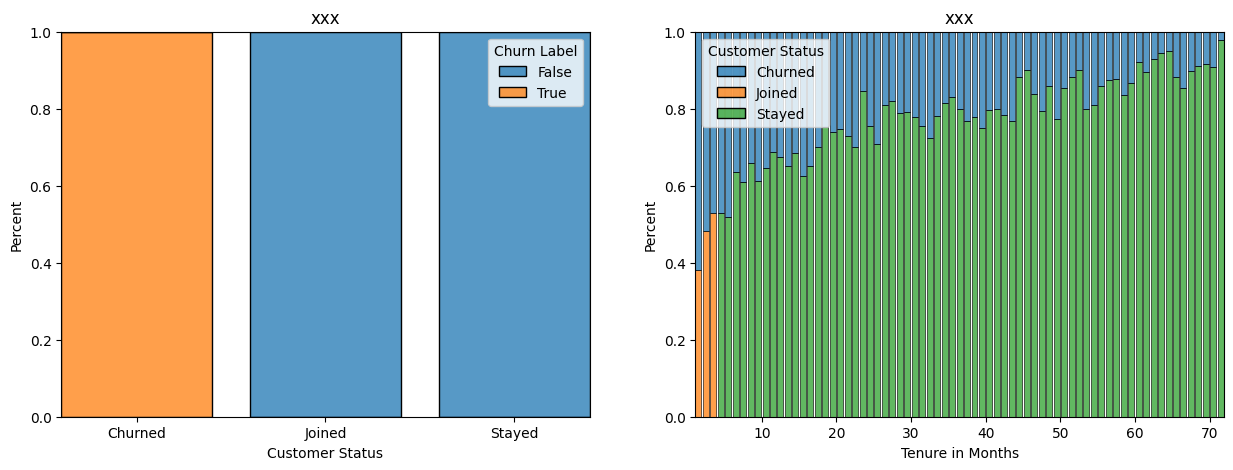

In [72]:
#Plot the relationship between Customer Status, Tenure in Months, and Churn Label
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(15,5))

chart = sns.histplot(x = 'Customer Status', data = df_s, hue = 'Churn Label', stat='percent', multiple='fill', shrink=0.8, common_norm=True, ax=axs[0]).set(title='xxx')
chart = sns.histplot(x = 'Tenure in Months', data = df_s, hue = 'Customer Status', stat='percent', multiple='fill', shrink=0.8, common_norm=True, binwidth = 1, ax=axs[1]).set(title='xxx')

The charts indicate that a customer status of Joined must occur within the first 3 months. In the charts, we can see that no user flagged as Joined has left, however, when we use tenure to indicate new customers, it is observed that plenty of recent (within the last 3 months), customers have indeed left the company. Based on this analysis, all observations should remain in the dataset for the model. In addition, the 'Customer Status' field should be removed for two reasons. First, it overlaps with the target we are looking to predict, which means it cannot be used for the prediciton. Second, the rest of the information contained in this field (essentially an encoded bucket of 'Churn Label' and 'Tenure in Months') is already availible to the model in 'Tenure in Months'.

In [273]:
#define the parameters from the function
LOD = 1
fields_to_drop = ['Customer Status']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)


#### df_s ####
number of features (columns) = 47
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [!] field = Customer Status is not in the DataFrame.

#### df_s ####
number of features (columns) = 47
number of observations (rows) = 7043
----------------------------


### Review Missing Values in Variables

In [275]:
# Inspect observations (rows) with null values
def count_all_rows_with_null(df):
  df_null = df.isnull()
  df_null['null_count'] = df_null.sum(axis=1)
  df_null['null_flag'] = df_null['null_count'].apply(lambda x: 1 if x > 0 else 0)

  df_null = df_null[df_null['null_count'] > 0]
  print('count of observations with nulls:',df_null['null_flag'].sum())

count_all_rows_with_null(df = df_s)

count of observations with nulls: 5174


In [277]:
# Identify Columns with Nulls
def identify_columns_with_null(df):
  a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
  nc = {}

  for c in df.columns:
      string_null = np.array([x in a[2:] for x in df[c]]).sum()
      std_null = df[c].isnull().sum()
      ttl_null = std_null + string_null
      if ttl_null > 0:
          nc[c] = ttl_null

  print('number of fields with nulls:', len(nc), '\n')
  print(pd.Series(nc))

  return nc

null_columns = identify_columns_with_null(df = df_s)

number of fields with nulls: 4 

Offer             3877
Internet Type     1526
Churn Category    5174
Churn Reason      5174
dtype: int64


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 2.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
        2700., 2750., 2800., 2850., 2900., 2950., 3000., 3050., 3100.,
        3150., 3200., 3250., 

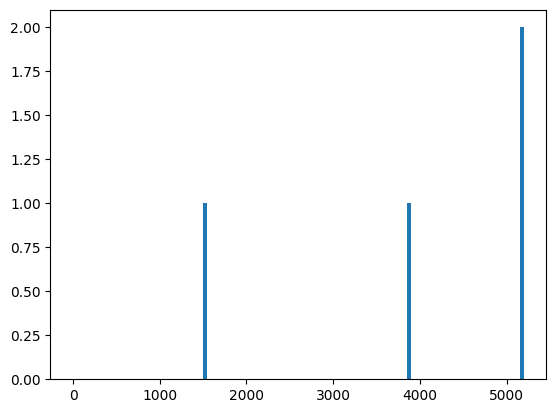

In [281]:
# Make a histogram of null counts
def histogram_of_null_cols(dict_null_columns):

  null_counts=pd.Series(dict_null_columns)
  histogram = plt.hist(null_counts, bins = range(0,5250,50)) # replace the histogram to be the plt.hist() object.
  return histogram

nc_hist = histogram_of_null_cols(dict_null_columns = null_columns)
nc_hist

In [286]:
#determine how to handle nulls
def null_col_plan(df, dict_null_columns):
  total_rows = len(df)
  print('total rows in dataset:', total_rows, '\n')
  null_counts=pd.Series(dict_null_columns)
  df_null_counts = pd.DataFrame(null_counts).reset_index().rename(columns={'index': 'feature', 0: 'nulls'})
  df_null_counts['pct'] = df_null_counts['nulls'] / total_rows

  features_to_impute = df_null_counts[df_null_counts['pct']<=0.05]['feature']
  features_to_throw = df_null_counts[df_null_counts['pct']>0.05]['feature']

  print('features to impute:', len(features_to_impute))
  print(features_to_impute, '\n')
  print('features to throw:', len(features_to_throw))
  print(features_to_throw, '\n')

  return features_to_impute, features_to_throw

features_to_impute, features_to_throw = null_col_plan(df = df_s, dict_null_columns = null_columns)

total rows in dataset: 7043 

features to impute: 0
Series([], Name: feature, dtype: object) 

features to throw: 4
0             Offer
1     Internet Type
2    Churn Category
3      Churn Reason
Name: feature, dtype: object 



In [287]:
# Drop Churn Category and Churn Reason based on significant null volumes
# Keep Offer and Internet Type as it valid to have None for these items

#define the parameters from the function
LOD = 1
fields_to_drop = ['Churn Category', 'Churn Reason']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)


#### df_s ####
number of features (columns) = 47
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [-] field = Churn Category dropped.

 [-] field = Churn Reason dropped.

#### df_s ####
number of features (columns) = 45
number of observations (rows) = 7043
----------------------------


### Review Categorical Variables

In [292]:
def get_variable_lists(df):
  cat_var = list(df.select_dtypes(['object', 'boolean', 'category']).columns)
  num_var = list(df.select_dtypes(['int64', 'float64']).columns)

  return cat_var, num_var

def print_variable_lists(cat_var, num_var):
  print('There are', len(cat_var), 'categorical variables.')
  print('categorical variables =', cat_var)
  print()
  print('There are', len(num_var), 'numeric variables.')
  print('numberic variables =', num_var)
  print()

def print_value_summary(cat_var, num_var):
  #list unique values in categorical variables
  print('listing unique values for each categorical variable:')
  for c in cat_var:
      unique_values = df_s[c].unique()
      print('--', c, 'has', len(unique_values), 'unique values. They are:', unique_values)
  print()
  print('listing range of values for each numeric variable:')
  for c in num_var:
      unique_values = df_s[c].unique()
      print('--', c, 'has min of', min(unique_values), 'and a max of', max(unique_values))
  print()

In [294]:
cat_var, num_var = get_variable_lists(df_s)
print_variable_lists(cat_var, num_var)
if gDEBUG: print_value_summary(cat_var, num_var)

There are 23 categorical variables.
categorical variables = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

There are 17 numeric variables.
numberic variables = ['Age', 'Number of Dependents', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV']

listing unique values for each categorical variable:
-- Gender has 2 unique values. They are: ['Male', 'Female']
Categories (2, object): ['Female', 'Ma

In [291]:
#Drop fields with too many categories
#define the parameters from the function
LOD = 1
fields_to_drop = ['Customer ID', 'City', 'Zip Code']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)

#Drop fields with only 1 category
#define the parameters from the function
LOD = 1
fields_to_drop = ['State', 'Country']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)


#### df_s ####
number of features (columns) = 45
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [-] field = Customer ID dropped.

 [-] field = City dropped.

 [-] field = Zip Code dropped.

#### df_s ####
number of features (columns) = 42
number of observations (rows) = 7043
----------------------------

#### df_s ####
number of features (columns) = 42
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [-] field = State dropped.

 [-] field = Country dropped.

#### df_s ####
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------


### Remove Variables Related to Target

In [297]:
if gDEBUG: quick_table_details('df_s', df_s, level_of_detail = 10)


#### df_s ####
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------
Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'Population', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Label', 'Churn Value', 'Churn

In [298]:
# Some variable relate to the churn indicator itself and thus should be excluded from the variables

#define the parameters from the function
LOD = 1
fields_to_drop = ['Churn Value', 'Churn Score', 'CLTV']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)


#### df_s ####
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [-] field = Churn Value dropped.

 [-] field = Churn Score dropped.

 [-] field = CLTV dropped.

#### df_s ####
number of features (columns) = 37
number of observations (rows) = 7043
----------------------------


### Summary of Data Clensing

#### Cleaned Data Descriptive Statistics

In [299]:
# Display a summary of table statistics
quick_table_details('df_s', df_s, level_of_detail = 2)
# Display a summary of the variables
cat_var, num_var = get_variable_lists(df_s)
print_variable_lists(cat_var, num_var)
print_value_summary(cat_var, num_var)
# Finally summary statistics
if gDEBUG: df_s.describe(include='all')


#### df_s ####
number of features (columns) = 37
number of observations (rows) = 7043
----------------------------
There are 23 categorical variables.
categorical variables = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

There are 14 numeric variables.
numberic variables = ['Age', 'Number of Dependents', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score']

listing unique values for each categorical variable:
-- Gender has 2 uniq

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label
count,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043
unique,2,NaN,2,2,2,2,NaN,NaN,2,NaN,NaN,6,2,NaN,2,2,4,NaN,2,2,2,2,2,2,2,2,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Male,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN,None,True,NaN,False,True,Fiber Optic,NaN,False,False,False,False,False,False,False,True,Month-to-Month,True,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,3555,NaN,5642,5901,3641,5416,NaN,NaN,3821,NaN,NaN,3877,6361,NaN,4072,5517,3035,NaN,5024,4614,4621,4999,4336,4311,4555,4745,3610,4171,3909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5174
mean,NaN,46.509726,NaN,NaN,NaN,NaN,0.468692,22139.603294,NaN,1.951867,32.386767,NaN,NaN,22.958954,NaN,NaN,NaN,20.515405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,NaN
std,NaN,16.750352,NaN,NaN,NaN,NaN,0.962802,21152.392837,NaN,3.001199,24.542061,NaN,NaN,15.448113,NaN,NaN,NaN,20.418940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,NaN
min,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000,11.000000,NaN,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,NaN
25%,NaN,32.000000,NaN,NaN,NaN,NaN,0.000000,2344.000000,NaN,0.000000,9.000000,NaN,NaN,9.210000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,NaN
50%,NaN,46.000000,NaN,NaN,NaN,NaN,0.000000,17554.000000,NaN,0.000000,29.000000,NaN,NaN,22.890000,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,NaN
75%,NaN,60.000000,NaN,NaN,NaN,NaN,0.000000,36125.000000,NaN,3.000000,55.000000,NaN,NaN,36.395000,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,NaN


# 6.&nbsp;Exploratory Data Analysis

## Overview of Target

## Histograms of Variables

In [85]:
'''
#code has long runtime and currently does not work

fig, axes = plt.subplots(nrows = 10, ncols = 5, figsize = (20,20), sharey = True)

for v, column in enumerate(cat_var):
  # Create a chart for each column in the data source
  chart = sns.histplot(x = column, data = df_s, hue = 'Churn Label', ax=axes.flat[v], stat='percent', multiple='fill', shrink=0.8, common_norm=True).set(title=column)
  # Format the Y axis and remove the label
  chart.set_ylabel('')
  # Remove the legend for the chart
  chart.legend_.remove()


fig.suptitle('Customer Churn by Variable')
plt.show()
'''

"\nfig, axes = plt.subplots(nrows = 10, ncols = 5, figsize = (20,20), sharey = True)\n\nfor v, column in enumerate(cat_var):\n  # Create a chart for each column in the data source\n  chart = sns.histplot(x = column, data = df_s, hue = 'Churn Label', ax=axes.flat[v], stat='percent', multiple='fill', shrink=0.8, common_norm=True).set(title=column)\n  # Format the Y axis and remove the label\n  chart.set_ylabel('')\n  # Remove the legend for the chart\n  chart.legend_.remove()\n\n\nfig.suptitle('Customer Churn by Variable')\nplt.show()\n"

## Correlation Matrix

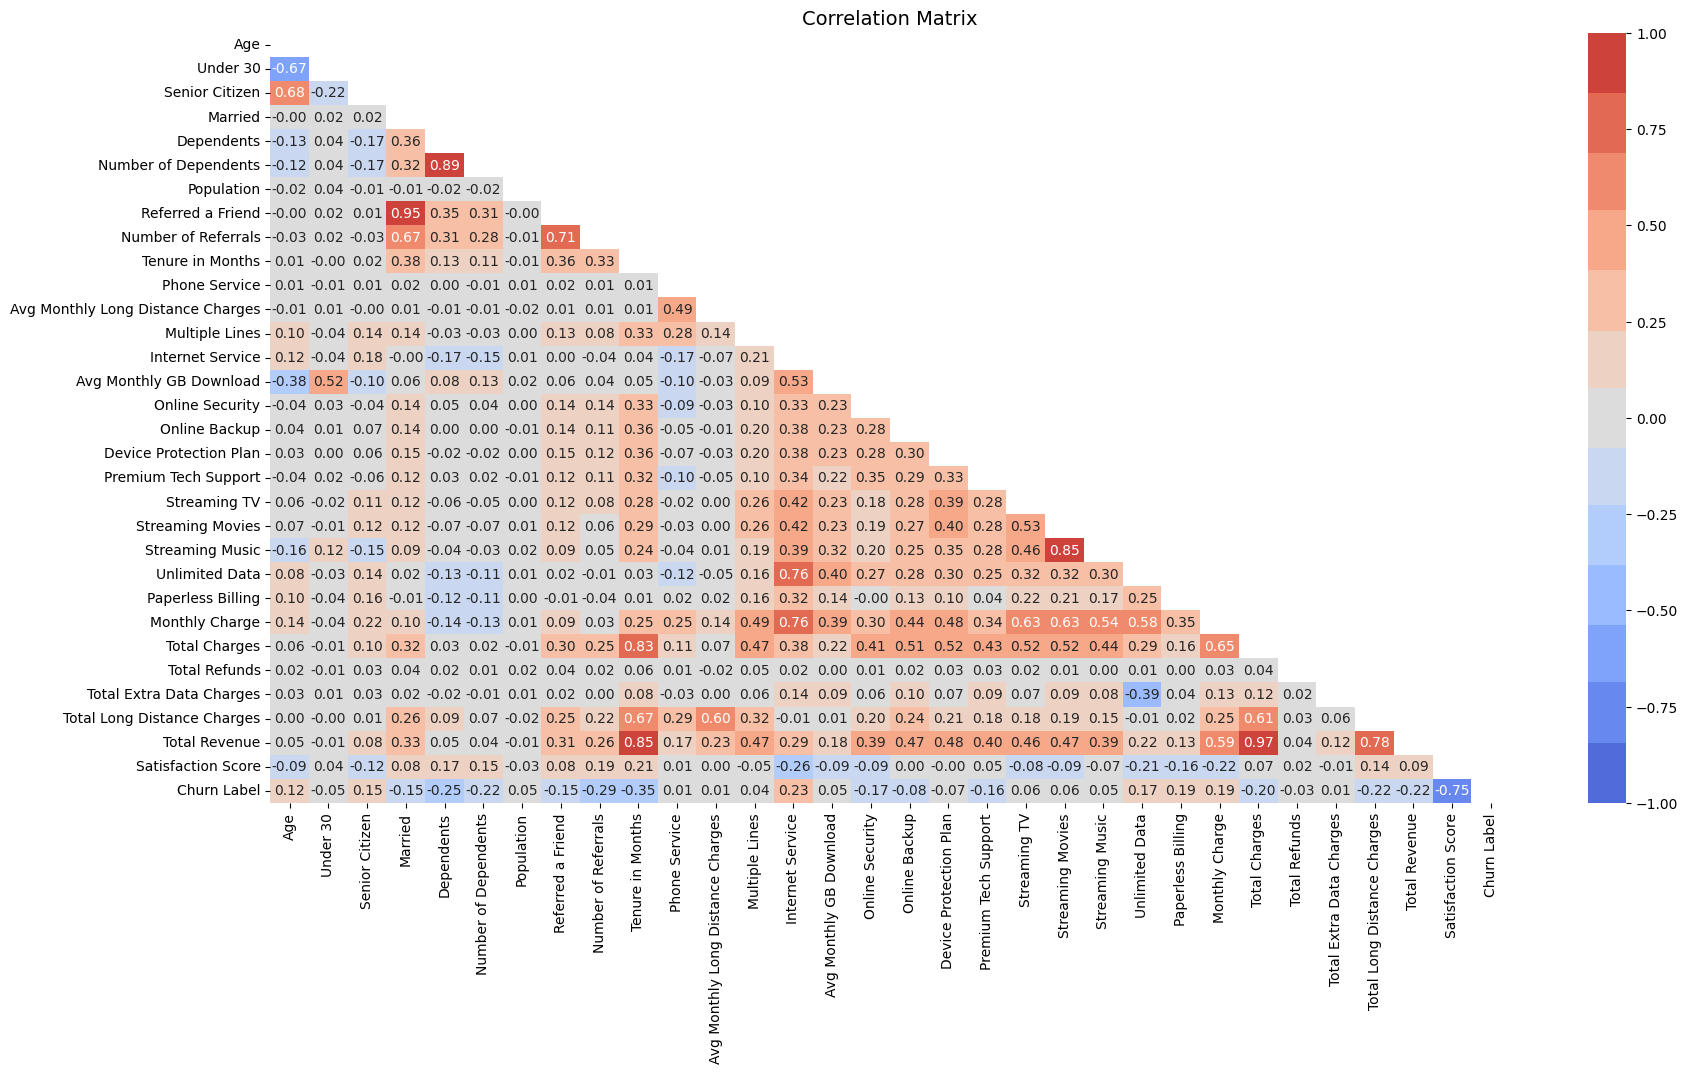

In [86]:
def print_corr_matrix(df):
  df_s = df
  # compute the correlation matrix
  cm = df_s.corr(method='pearson', min_periods=1, numeric_only=True).round(2)
  mask = np.triu(np.ones_like(cm, dtype=bool))
  # correlation matrix using a heatmap
  fig, ax = plt.subplots(figsize=(20, 10))
  heat_map = sns.heatmap(cm,
                        annot = True,
                        cmap = sns.color_palette("coolwarm", 13),
                        vmax=1, vmin=-1, center=0,
                        fmt=".2f",
                        mask=mask
      )
  #modify individual font size of elements
  plt.title('Correlation Matrix', fontsize = 14)
  plt.tick_params(axis='both', which='major', labelsize=10)

  plt.show()

print_corr_matrix(df_s)

## Pair Plot of the Data

In [87]:
def print_pair_plot(df):
  df_s = df
  #create pair plot
  #fig, ax = plt.subplots(figsize=(15, 10))
  p_plot = sns.pairplot(df_s, diag_kind = 'kde')
  #save the image
  plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')

  #modify individual font size of elements
  #plt.title('Pair Plot', fontsize = 28)
  #plt.tick_params(axis='both', which='major', labelsize=14)

  #plt.show()

#commented out to save time on file refresh
#print_pair_plot(df_s)

## Feature Importance

## Summary of Exploratory Data Analsis

### Summary

### Conclusions

# 7.&nbsp;Modeling

## Model Pre-Processing

In [88]:
###

### Model Overview

### Review of Colinearity

### Feature Engineering

In [300]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

class data_churn:
    """
    Class to structure dataset for training and testing through pre-processing and feature engineering

    Reference the following attributes:
    -- Feature Lists: feature_names, feature_names_dummy, dummy_names
    -- Input Data: y, X, X_dummies
    -- Training Data: y_train, x_train, x_train_dummies
    -- Testing Dats: y_test, x_test, x_test_dummies
    """

    def __init__(self, df, test_size = 0.2):
        # Create the full dataset
        self.y = df.copy()['Churn Label']
        self.X = df.copy().drop(['Churn Label'], axis=1)

        # Create the full dataset with dummy variables
        self.X_dummies = pd.get_dummies(self.X)

        # Split the data to train and test datasets such that the test dataset is 20% of original data
        from sklearn.model_selection import train_test_split
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = test_size, stratify = self.y, shuffle = True, random_state = 27)

        # Create the test and train dataset with dummy variables
        self.x_train_dummies = pd.get_dummies(self.x_train)
        self.x_test_dummies = pd.get_dummies(self.x_test)

        # Create the list of feature names and dummy feature names
        self.feature_names = set(self.X.columns)
        self.feature_names_dummy = set(self.X_dummies.columns)
        self.dummy_names = self.feature_names_dummy - self.feature_names

    def describe(self, LOD = 10):
      # LOD = 1: Summerize the feature datasets and the split executed
      if LOD >= 1:
          print()
          print('Length of all:\t\t', len(self.X))
          print('Length of train:\t', len(self.x_train))
          print('Length of test:\t\t', len(self.x_test))
          print('Percent for testing:\t', round(len(self.x_test)/len(self.X),2))
          print()

      # LOD = 2: Summerize the features and dummy features created
      if LOD >= 1:
          y_df = pd.DataFrame(self.y)
          print('Number of targets:\t', len(y_df.columns))
          print('List of targets:\t', y_df.columns)
          print()
          print('Number of feature:\t', len(self.feature_names))
          print('List of features:\t', self.feature_names)
          print()
          print('Number of dummies:\t', len(self.dummy_names))
          print('List of dummies:\t', self.dummy_names)
          print()
          print('Number of feature with dummies:\t', len(self.feature_names_dummy))
          print('List of features with dummies:\t', self.feature_names_dummy)
          print()

      # LOD = 3: Summarize the stratification of targets across test and train
      if LOD >= 3:
          print('All Records:', self.y.value_counts(), '\n')
          print('Train Records:', self.y_train.value_counts(), '\n')
          print('Test Records:', self.y_test.value_counts(), '\n')

      # LOD = 4: Display a sample of train and train with dummy features
      if LOD >= 4:
          print('Displaying a sample of x_train:')
          print(self.x_train.head())
          print()
          print('Displaying a sample of x_train_dummies:')
          print(self.x_train_dummies.head())
          print()

In [301]:
# Create test/train dataset with a test size split
dc = data_churn(df = df_s, test_size = 0.2)
# describe the data source created
dc.describe(LOD = 10)


Length of all:		 7043
Length of train:	 5634
Length of test:		 1409
Percent for testing:	 0.2

Number of targets:	 1
List of targets:	 Index(['Churn Label'], dtype='object')

Number of feature:	 36
List of features:	 {'Senior Citizen', 'Referred a Friend', 'Number of Dependents', 'Offer', 'Gender', 'Internet Service', 'Population', 'Avg Monthly Long Distance Charges', 'Internet Type', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Total Refunds', 'Total Extra Data Charges', 'Online Backup', 'Married', 'Paperless Billing', 'Device Protection Plan', 'Monthly Charge', 'Satisfaction Score', 'Under 30', 'Payment Method', 'Tenure in Months', 'Number of Referrals', 'Total Charges', 'Multiple Lines', 'Dependents', 'Total Revenue', 'Contract', 'Phone Service', 'Total Long Distance Charges', 'Age', 'Online Security', 'Avg Monthly GB Download', 'Streaming Music', 'Unlimited Data'}

Number of dummies:	 18
List of dummies:	 {'Offer_None', 'Internet Type_DSL', 'Offer_Offer C', 'Offer_

## Model: Random Forest Classifier

#### Baseline Model Functions

In [303]:
#### Baseline Model Functions

In [97]:
# create a model tracker to capture key model details
model_tracker = {'Model': [],
                 'Mean Accuracy' : [],
                 'Mean ROC AUC' : [],
                 'Fit Time' : [],
                 'Score Time' : []}

# function to add new model stats to the model tracker
def add_model_to_tracker(model_tracker, model_name, score_k):
  m = model_tracker
  k = score_k
  m['Model'].append(model_name)
  m['Mean Accuracy'].append(k[(k['Metric'] == 'Accuracy') & (k['Group'] == 'test_')]['Mean'].iloc[0])
  m['Mean ROC AUC'].append(k[(k['Metric'] == 'ROC AUC') & (k['Group'] == 'test_')]['Mean'].iloc[0])
  m['Fit Time'].append(k[(k['Metric'] == 'fit_time')]['Mean'].iloc[0])
  m['Score Time'].append(k[(k['Metric'] == 'score_time')]['Mean'].iloc[0])
  return m


#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

def create_baseline_clf():
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.datasets import make_classification

  random_state = 27
  bootstrap = True     # True, False
  verbose = 0
  criterion = 'gini'   #'gini', 'entropy', 'log_loss'
  n_estimators = 100   # 10 - 1000
  max_depth = 5        # 2,4,6,8,10,12,14,16,18,20
  min_samples_leaf = 1 #2,4,6,8,10

  # Create the classifier
  clf = RandomForestClassifier(random_state = 27,
                              bootstrap = True,
                              verbose = 0,
                              criterion = criterion,
                              n_estimators = n_estimators,
                              max_depth = max_depth,
                              min_samples_leaf = min_samples_leaf
                              )

  clf.fit(dc.x_train_dummies, dc.y_train)

  clf_score = clf.score(dc.x_test_dummies, np.array(dc.y_test))

  print('Baseline CLF Score:', clf_score)

  return clf

# https://scikit-learn.org/stable/modules/model_evaluation.html

def build_rskf(n_splits = 5, n_repeats = 3, random_state = 27):

  # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html
  from sklearn.model_selection import RepeatedStratifiedKFold

  rskf = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats, random_state = random_state)

  return rskf

def score_holdout(clf, X, y):
    """
    Computes prediction accuracy of classifier.

    Args:
        clf        : classsifier model created and fitted
        X (ndarray): [n_samples x n_features] ndarray of data
        y (ndarray): [n_samples] ndarray of true labels

    Returns:
        Prediction accuracy (between 0.0 and 1.0).
    """

    # Predict the outcomes based on X
    ypred = clf.predict(X)
    ytrue = y

    # https://scikit-learn.org/stable/modules/model_evaluation.html
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import f1_score

    # generate the metrics for the holdout data set
    dict_scores = {}
    dict_scores['Accuracy'] = accuracy_score(ytrue, ypred)
    dict_scores['Precision'] = precision_score(ytrue, ypred)
    dict_scores['Recall'] = recall_score(ytrue, ypred)
    dict_scores['ROC AUC'] = roc_auc_score(ytrue, ypred)
    dict_scores['F1'] = f1_score(ytrue, ypred)

    metric = []
    score = []
    for key, value in dict_scores.items():
      metric.append(key)
      score.append(round(value,3))

    df_scores = pd.DataFrame({'Metric' : metric, 'Score' : score})

    return df_scores

def score_kfold(clf, X, y):

  # build the repeated stratified k-fold
  rskf = build_rskf()

  # https://scikit-learn.org/stable/modules/model_evaluation.html
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import f1_score

  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
  from sklearn.metrics import make_scorer
  dict_score_metrics = {'Accuracy' : make_scorer(accuracy_score),
                        'Precision' : make_scorer(precision_score),
                        'Recall' : make_scorer(recall_score),
                        'ROC AUC' : make_scorer(roc_auc_score),
                        'F1' : make_scorer(f1_score)
  }

  #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
  from sklearn.model_selection import cross_validate
  dict_scores = cross_validate(clf, X, y, cv = rskf, scoring = dict_score_metrics, return_train_score=True)

  group = []; metric = []; min = []; mean = []; max = []; std = []; itr = []
  for key in dict_scores.keys():
      if 'test_' in key:
        g = 'test_'
      elif 'train_' in key:
        g = 'train_'
      else:
        g = 'other_'
      group.append(g)
      metric.append(key.replace(g, ''))
      min.append(round(np.min(dict_scores[key]),3))
      mean.append(round(np.mean(dict_scores[key]),3))
      max.append(round(np.max(dict_scores[key]),3))
      std.append(round(np.std(dict_scores[key]),3))
      itr.append(dict_scores[key].size)

  df_scores = pd.DataFrame({'Group' : group,
                            'Metric' : metric,
                            'Min' : min,
                            'Mean' : mean,
                            'Max' : max,
                            'Std Dev' : std,
                            'Iterations' : itr
                            })

  return df_scores, dict_scores

### Baseline Model Creation

In [302]:
# Create the baseline model
clf_baseline = create_baseline_clf()

Baseline CLF Score: 0.9531582682753726


### Baseline Model Evaluation

In [93]:
# Assess the model against the holdout data
score_h_baseline = score_holdout(clf = clf_baseline, X = dc.x_test_dummies, y = dc.y_test)
# Assess the model in a k-fold framework
score_k_baseline, dict_scores_baseline = score_kfold(clf = clf_baseline, X = dc.X_dummies, y = dc.y)

In [94]:
# Assess the model against the holdout data
print('Results of model fit for holdout data vs. the training data set.')
print(score_h_baseline)
print()
print('Results of model fit on average across a stratified k-fold.')
print(score_k_baseline)

Results of model fit for holdout data vs. the training data set.
      Metric  Score
0   Accuracy  0.953
1  Precision  0.984
2     Recall  0.837
3    ROC AUC  0.916
4         F1  0.905

Results of model fit on average across a stratified k-fold.
     Group      Metric    Min   Mean    Max  Std Dev  Iterations
0   other_    fit_time  0.523  0.628  0.834    0.121          15
1   other_  score_time  0.027  0.032  0.045    0.007          15
2    test_    Accuracy  0.944  0.952  0.963    0.005          15
3   train_    Accuracy  0.951  0.954  0.956    0.001          15
4    test_   Precision  0.966  0.988  1.000    0.010          15
5   train_   Precision  0.978  0.991  0.996    0.004          15
6    test_      Recall  0.789  0.828  0.864    0.020          15
7   train_      Recall  0.817  0.834  0.844    0.007          15
8    test_     ROC AUC  0.894  0.912  0.931    0.010          15
9   train_     ROC AUC  0.908  0.915  0.920    0.003          15
10   test_          F1  0.882  0.901  0

In [95]:
# Register baseline model in the tracker
model_tracker = add_model_to_tracker(model_tracker = model_tracker, model_name = 'Baseline', score_k = score_k_baseline)
print(model_tracker)

{'Model': ['Baseline', 'Baseline'], 'Mean Accuracy': [0.952, 0.952], 'Mean ROC AUC': [0.912, 0.912], 'Fit Time': [0.558, 0.628], 'Score Time': [0.031, 0.032]}


### Hyper Parameter Tuning - Course Grain

#### Course Grain Tuning Functions

In [96]:
# Run the grid analysis on a single parameter to optimize
def tune_single_param(clf, data, cv = 3, param = 'n_estimators', param_max = 100, param_step_size = 10):
  from sklearn.model_selection import cross_val_score, GridSearchCV

  # Create list of parameters to use in experiment
  parameters = {param: list(range(param_step_size, param_max+1, param_step_size))}

  grid = GridSearchCV(clf,
                      param_grid = parameters,
                      scoring = 'accuracy',
                      cv = cv,
                      n_jobs = -1,
                      verbose = 2,
                      return_train_score = True)

  grid.fit(data.x_train_dummies,data.y_train)

  return grid

# Print a brief summary of the best parameter summary
def print_grid_summary(grid):
  print()
  print('Best Parameters: ', grid.best_params_)
  print('Best Estimator: ', grid.best_estimator_)
  print('Best Score: ', grid.best_score_)
  print()

# Return a table of results
def results_table_single_params(grid, param_label):
  #unpack list of parameter dictionaries
  params = []
  for list_item in grid.cv_results_['params']:
    for key, value in list_item.items():
      params.append(value)

  results_table = pd.DataFrame({'param_label' : param_label,
                                'x_parameter' : params,
                                'y_train_score' : grid.cv_results_['mean_train_score'],
                                'y_test_score' : grid.cv_results_['mean_test_score'],
                                'y_model_time' : grid.cv_results_['mean_fit_time'],
                                'y_score_time' : grid.cv_results_['mean_score_time'],
                                })

  results_table['n_model_time'] = 1 - (results_table['y_model_time'] - results_table['y_model_time'].min()) / (results_table['y_model_time'].max() - results_table['y_model_time'].min())
  results_table['n_score_time'] = 1 - (results_table['y_score_time'] - results_table['y_score_time'].min()) / (results_table['y_score_time'].max() - results_table['y_score_time'].min())
  results_table['n_test_score'] = (results_table['y_test_score'] - results_table['y_test_score'].min()) / (results_table['y_test_score'].max() - results_table['y_test_score'].min())
  results_table['weighted_selection'] = (0.5 * results_table['n_test_score'] #half the score is based on accuracy score
                                         + 0.25 * (results_table['n_score_time'] + results_table['n_test_score']) #half the score is based on time performance
                                        )

  results_table = results_table.drop(columns = ['n_model_time', 'n_score_time', 'n_test_score'])

  return results_table

def results_plot_single_params(results_table):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  x = list(results_table['x_parameter'])
  y = list(results_table['weighted_selection'])
  line = ax.plot(x, y)

  ymax = max(y)
  xpos = y.index(ymax)
  xmax = x[xpos]

  ax.annotate('parameter = ' + str(xmax), xy=(xmax, ymax),
              xytext=(xmax+10, ymax+0.05),
              arrowprops=dict(facecolor = 'black',
                              shrink = 0.1,
                              linewidth = 1,
                              width = 1,
                              headwidth = 4,
                              headlength = 4)
              )

  plt.show()
  print('max value of', round(ymax, 3), 'for the weighted selection score occurs at parameter =', xmax, '\n')
  return xmax, ymax, xpos

# Chart the performance of the single parameter
def chart_single_param(grid, param_label, score_label):
  #unpack list of parameter dictionaries
  params = []
  for list_item in grid.cv_results_['params']:
    for key, value in list_item.items():
      params.append(value)

  #create arrays to plot
  x_parameter = params
  y_train_score = grid.cv_results_['mean_train_score']
  y_test_score = grid.cv_results_['mean_test_score']
  y_model_time = grid.cv_results_['mean_fit_time']
  y_score_time = grid.cv_results_['mean_score_time']

  #Create a subplot to map 2 charts
  fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(10,3))
  #Create subplot 1 based on Time
  plt.subplot(121)
  plt.plot(x_parameter, y_model_time, label = 'Model Training Time')
  plt.plot(x_parameter, y_score_time, label = 'Model Scoring Time')
  plt.legend()
  plt.xlabel(param_label)
  plt.ylabel('Total Time (seconds)')
  plt.title('Time Taken to Complete Task')

  #Create subplot 2 based on metric
  plt.subplot(122)
  plt.plot(x_parameter, y_train_score, label = 'Training Mean Error')
  plt.plot(x_parameter, y_test_score, label = 'Testing Mean Error')
  plt.legend()
  plt.xlabel(param_label)
  plt.ylabel(score_label)
  plt.title(score_label + ' vs. Parameter')

####Tuning: Number of Trees

In [98]:
# Create the classifier
clf_tree = RandomForestClassifier(random_state = 27, verbose = 0, bootstrap = True)
# Run the course grain test on the model
grid_tree_size = tune_single_param(clf = clf_tree, data = dc, cv = 3,
                                param = 'n_estimators', param_max = 50, param_step_size = 5)

Fitting 3 folds for each of 10 candidates, totalling 30 fits



Best Parameters:  {'n_estimators': 50}
Best Estimator:  RandomForestClassifier(n_estimators=50, random_state=27)
Best Score:  0.9613063542776003



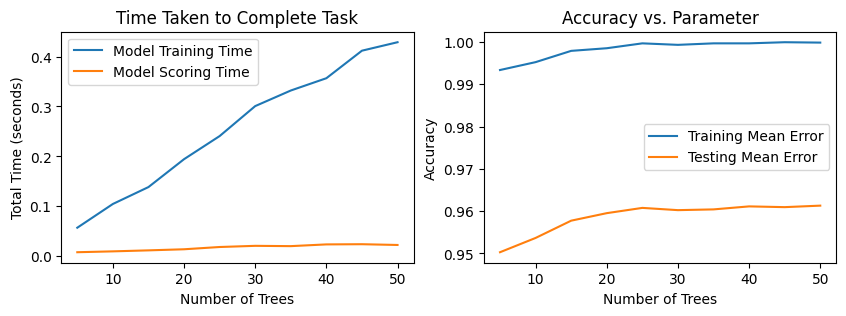

In [99]:
# Display the best paramenter
print_grid_summary(grid_tree_size)
# Chart the results
chart_single_param(grid_tree_size, param_label = 'Number of Trees', score_label = 'Accuracy')

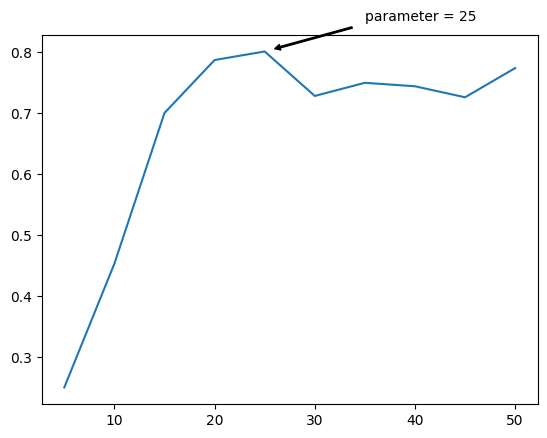

max value of 0.801 for the weighted selection score occurs at parameter = 25 



,param_label,x_parameter,y_train_score,y_test_score,y_model_time,y_score_time,weighted_selection
1,Number of Trees,10,0.995208,0.953674,0.104710,0.009794,0.452957
2,Number of Trees,15,0.997870,0.957756,0.138566,0.011792,0.700045
3,Number of Trees,20,0.998491,0.959531,0.194420,0.013981,0.786893
4,Number of Trees,25,0.999645,0.960774,0.240696,0.018515,0.800914
5,Number of Trees,30,0.999290,0.960241,0.300745,0.020864,0.728017
6,Number of Trees,35,0.999645,0.960419,0.331967,0.020259,0.749543
7,Number of Trees,40,0.999645,0.961129,0.356589,0.023729,0.743853


In [100]:
# create a results table
results_table = results_table_single_params(grid_tree_size, param_label = 'Number of Trees')
# plot and identify the target param based on the max weighted selection score
target_param_value, max_score, target_index = results_plot_single_params(results_table)
# display a snapshot of the results table focused on the target parameter
results_table.head(target_index + 4).tail(7)

####Tuning: Max Depth

In [101]:
# Create the classifier
clf_max_depth = RandomForestClassifier(random_state = 27, verbose = 0, bootstrap = True)
# Run the course grain test on the model
grid_max_depth = tune_single_param(clf = clf_max_depth, data = dc, cv = 3,
                                param = 'max_depth', param_max = 80, param_step_size = 2)

Fitting 3 folds for each of 40 candidates, totalling 120 fits



Best Parameters:  {'max_depth': 14}
Best Estimator:  RandomForestClassifier(max_depth=14, random_state=27)
Best Score:  0.9621938232161874



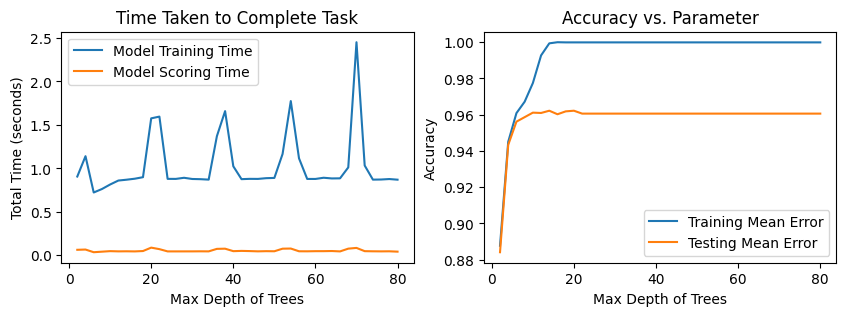

In [102]:
# Display the best paramenter
print_grid_summary(grid_max_depth)
# Chart the results
chart_single_param(grid_max_depth, param_label = 'Max Depth of Trees', score_label = 'Accuracy')

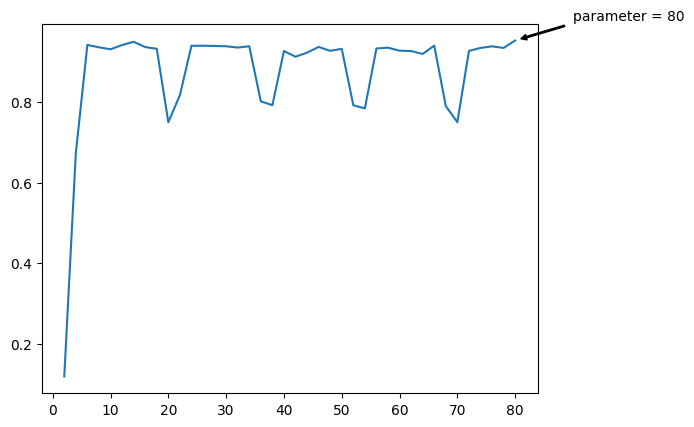

max value of 0.953 for the weighted selection score occurs at parameter = 80 



,param_label,x_parameter,y_train_score,y_test_score,y_model_time,y_score_time,weighted_selection
33,Max Depth,68,0.999911,0.960596,1.011333,0.076353,0.790024
34,Max Depth,70,0.999911,0.960596,2.452031,0.084822,0.749954
35,Max Depth,72,0.999911,0.960596,1.032996,0.047392,0.927061
36,Max Depth,74,0.999911,0.960596,0.870652,0.045819,0.934507
37,Max Depth,76,0.999911,0.960596,0.872000,0.044992,0.938420
38,Max Depth,78,0.999911,0.960596,0.877419,0.045819,0.934506
39,Max Depth,80,0.999911,0.960596,0.870076,0.041907,0.953018


In [103]:
# create a results table
results_table = results_table_single_params(grid_max_depth, param_label = 'Max Depth')
# plot and identify the target param based on the max weighted selection score
target_param_value, max_score, target_index = results_plot_single_params(results_table)
# display a snapshot of the results table focused on the target parameter
results_table.head(target_index + 4).tail(7)

####Tuning: Min Sample Leafs

In [104]:
# Create the classifier
clf_min_samples_leaf = RandomForestClassifier(random_state = 27, verbose = 0, bootstrap = True)
# Run the course grain test on the model
grid_min_samples_leaf = tune_single_param(clf = clf_min_samples_leaf, data = dc, cv = 3,
                                param = 'min_samples_leaf', param_max = 80, param_step_size = 2)

Fitting 3 folds for each of 40 candidates, totalling 120 fits



Best Parameters:  {'min_samples_leaf': 2}
Best Estimator:  RandomForestClassifier(min_samples_leaf=2, random_state=27)
Best Score:  0.9621938232161874



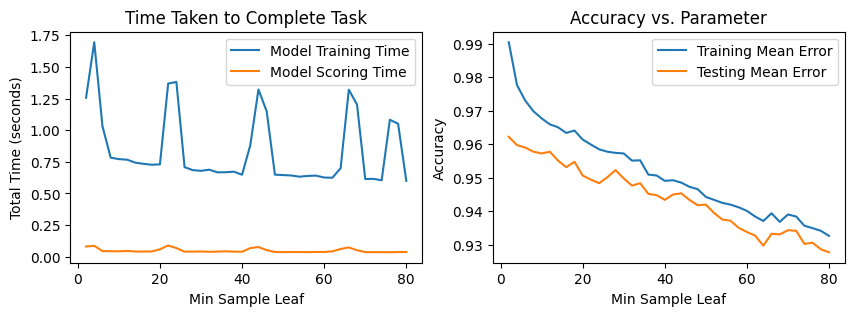

In [105]:
# Display the best paramenter
print_grid_summary(grid_min_samples_leaf)
# Chart the results
chart_single_param(grid_min_samples_leaf, param_label = 'Min Sample Leaf', score_label = 'Accuracy')

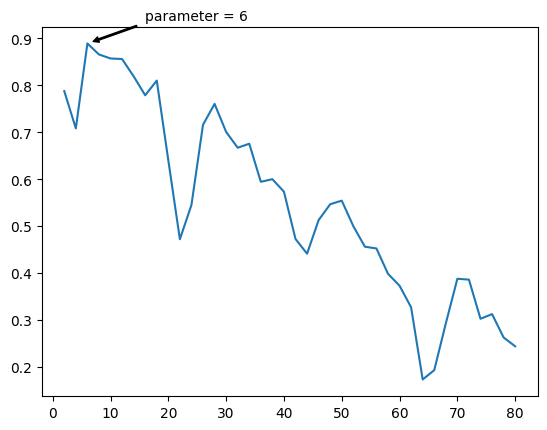

max value of 0.889 for the weighted selection score occurs at parameter = 6 



,param_label,x_parameter,y_train_score,y_test_score,y_model_time,y_score_time,weighted_selection
0,Min Sample Leaf,2,0.990415,0.962194,1.255873,0.080196,0.787535
1,Min Sample Leaf,4,0.977636,0.959709,1.695248,0.085600,0.708057
2,Min Sample Leaf,6,0.973021,0.958999,1.031536,0.043705,0.889155
3,Min Sample Leaf,8,0.969826,0.957756,0.782560,0.042928,0.865734
4,Min Sample Leaf,10,0.967696,0.957224,0.771134,0.042279,0.857183
5,Min Sample Leaf,12,0.965921,0.957756,0.766591,0.045007,0.855985


In [106]:
# create a results table
results_table = results_table_single_params(grid_min_samples_leaf, param_label = 'Min Sample Leaf')
# plot and identify the target param based on the max weighted selection score
target_param_value, max_score, target_index = results_plot_single_params(results_table)
# display a snapshot of the results table focused on the target parameter
results_table.head(target_index + 4).tail(7)

#### Course Grain Model Evaluation

In [107]:
# Create the baseline model
n_estimators = 25
max_depth = 20
min_samples_leaf = 4

# Create the classifier
clf_course = RandomForestClassifier(random_state = 27,
                                    bootstrap = True,
                                    verbose = 0,
                                    criterion = 'gini',
                                    n_estimators = n_estimators,
                                    max_depth = max_depth,
                                    min_samples_leaf = min_samples_leaf
                                    )
clf_course.fit(dc.x_train_dummies, dc.y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=25,
                       random_state=27)

In [108]:
# Assess the model against the holdout data
score_h_course = score_holdout(clf = clf_course, X = dc.x_test_dummies, y = dc.y_test)
# Assess the model in a k-fold framework
score_k_course, dict_scores_course = score_kfold(clf = clf_course, X = dc.X_dummies, y = dc.y)

In [109]:
# Assess the model against the holdout data
print('Results of model fit for holdout data vs. the training data set.')
print(score_h_course)
print()
print('Results of model fit on average across a stratified k-fold.')
print(score_k_course)

Results of model fit for holdout data vs. the training data set.
      Metric  Score
0   Accuracy  0.959
1  Precision  0.976
2     Recall  0.866
3    ROC AUC  0.929
4         F1  0.918

Results of model fit on average across a stratified k-fold.
     Group      Metric    Min   Mean    Max  Std Dev  Iterations
0   other_    fit_time  0.207  0.282  0.310    0.034          15
1   other_  score_time  0.017  0.026  0.030    0.004          15
2    test_    Accuracy  0.952  0.961  0.969    0.004          15
3   train_    Accuracy  0.977  0.978  0.980    0.001          15
4    test_   Precision  0.954  0.971  0.985    0.010          15
5   train_   Precision  0.989  0.993  0.996    0.002          15
6    test_      Recall  0.853  0.878  0.896    0.013          15
7   train_      Recall  0.918  0.925  0.932    0.004          15
8    test_     ROC AUC  0.922  0.934  0.945    0.007          15
9   train_     ROC AUC  0.958  0.961  0.965    0.002          15
10   test_          F1  0.905  0.922  0

In [110]:
# Course Tuned baseline model in the tracker
model_tracker = add_model_to_tracker(model_tracker = model_tracker, model_name = 'Course Tuned', score_k = score_k_course)
print(model_tracker)

{'Model': ['Course Tuned'], 'Mean Accuracy': [0.961], 'Mean ROC AUC': [0.934], 'Fit Time': [0.282], 'Score Time': [0.026]}


In [111]:
df_mt = pd.DataFrame(model_tracker)
df_mt

,Model,Mean Accuracy,Mean ROC AUC,Fit Time,Score Time
0,Course Tuned,0.961,0.934,0.282,0.026


### Hyper Parameter Tuning - Fine Grain

#### Tuning Parameter Functions - Fine Grain

In [112]:
#Tuning Parameter Functions

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


def plotSearchGrid(grid, param_1, param_2):

    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid[param_1]), len(grid.param_grid[param_2]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel(param_2)
    plt.ylabel(param_1)
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid[param_2])), grid.param_grid[param_2], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid[param_1])), grid.param_grid[param_1])
    plt.title('Validation Accuracy')
    plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")

####Tuning - Criteria and Estimators

In [304]:
#Grid Search
# Run the grid analysis on multiple parameter to optimize
def tune_multi_param(clf, data, param, cv = 3):
  from sklearn.model_selection import cross_val_score, GridSearchCV

  # Create list of parameters to use in experiment
  parameters = {param: list(range(param_step_size, param_max+1, param_step_size))}

  grid = GridSearchCV(clf,
                      param_grid = parameters,
                      scoring = 'accuracy',
                      cv = cv,
                      n_jobs = -1,
                      verbose = 2,
                      return_train_score = True)

  grid.fit(data.x_train_dummies,data.y_train)

  return grid

# Create the classifier
clf_fine = RandomForestClassifier(random_state = 27,
                                    bootstrap = True,
                                    verbose = 0,
                                    criterion = 'gini'
                                    )

set_n_estimators =     list(range(10, 40, 5)) #centered around 25
set_max_depth =        list(range(10, 30, 5)) # centered around 20
set_min_samples_leaf = list(range(1, 7, 1)) # centered around 4

# Create list of parameters to use in experiment
parameters = {'n_estimators'     : set_n_estimators,
              'max_depth'        : set_max_depth,
              'min_samples_leaf' : set_min_samples_leaf
              }

# Run the course grain test on the model
grid_fine = tune_multi_param(clf = clf_fine, data = dc, param = parameters, cv = 3)                                )

SyntaxError: ignored

In [114]:
# Display the best paramenter
print_grid_summary(grid_fine)
# Chart the results
chart_single_param(grid_fine, param_label = 'All', score_label = 'Accuracy')


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 20}
Best Estimator:  RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=20,
                       random_state=27)
Best Score:  0.9618389884334304



KeyError: ignored

In [ ]:
grid_fine.best_estimator_.score(dc.x_test_dummies,dc.y_test)

print('Best Parameters: ', grid_fine.best_params_)
print('Best Estimator: ', grid_fine.best_estimator_)
print('Best Score: ', grid_fine.best_score_)


In [ ]:
'''
param_1 = 'criterion'
param_2 = 'n_estimators'
scores = [x for x in grid.cv_results_["mean_test_score"]]
scores = np.array(scores).reshape(len(grid.param_grid[param_1]), len(grid.param_grid[param_2]))
print(scores)
'''

In [ ]:
'''
plotSearchGrid(grid = grid, param_1 = 'criterion', param_2 = 'n_estimators')
'''

####Tuning - Depth and Min Sample Leafs

In [ ]:
#Grid Search

from sklearn.model_selection import cross_val_score, GridSearchCV

num_list = []
for i in list(range(0, 8)):
    num_list.append(pow(2,i))
print(num_list)

# Create the classifier
clf = RandomForestClassifier(random_state = 27, verbose = 0, bootstrap = True, criterion = 'gini', n_estimators = 100)

# Create list of parameters to use in experiment
parameters = {'max_depth':num_list,
              'min_samples_leaf':num_list
              }

grid = GridSearchCV(clf, parameters, cv = 5).fit(dc.x_train_dummies,dc.y_train)

print('Best Estimator: ', grid.best_estimator_)
print('Best Score: ', grid.best_score_)
print('Best Parameters: ', grid.best_params_)

In [ ]:
grid.best_estimator_.score(dc.x_test_dummies,dc.y_test)

In [ ]:
param_1 = 'max_depth'
param_2 = 'min_samples_leaf'
scores = [x for x in grid.cv_results_["mean_test_score"]]
scores = np.array(scores).reshape(len(grid.param_grid[param_1]), len(grid.param_grid[param_2]))
print(scores)

In [ ]:
plotSearchGrid(grid = grid, param_1 = 'max_depth', param_2 = 'min_samples_leaf')

### Final Model Performance

###Feature Importance

In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

# create an analysis table of feature importance
def feature_importance(dc, clf):
  import time
  import numpy as np
  import pandas as pd

  # Extract the feature names to match the order of the model
  feature_names = dc.x_train_dummies.columns

  # Calculate the importance and the standard error for each feature
  start_time = time.time()
  importances = clf.feature_importances_
  std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
  elapsed_time = time.time() - start_time

  # Create dataframe to store the feature importance
  forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
  frame = {'Feature' : forest_importances.index,
          'Importance' : round(forest_importances, 3),
          'Std' : std,
          'Cumulative Importance' : np.cumsum(round(forest_importances, 3))}
  fi_df = pd.DataFrame(frame).reset_index(drop=True)

  print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds\n")

  return fi_df

# create a feature importance chart
def feature_imortance_chart(fi_df, top_x = 15):
  fig, ax = plt.subplots(figsize=(10,5))
  fi_df.head(top_x).drop(columns=['Cumulative Importance']).plot.bar('Feature', yerr='Std', ax=ax)
  ax.set_title("Feature Importances Using MDI")
  ax.set_ylabel("Mean Decrease in Impurity")
  fig.tight_layout()

# create a cumulative feature importance chart
def feature_imortance_cum_chart(fi_df, top_x = 15):
  x = list(fi_df.head(top_x)['Feature'])
  y = list(fi_df.head(top_x)['Cumulative Importance'])

  fig, ax = plt.subplots(figsize=(10,5))
  plt.plot(x, y)
  plt.title("Cumulative Feature Importances Using MDI")
  plt.ylabel("Cumulative Decrease in Impurity")
  plt.xlabel("Features")
  plt.ylim([0.3, 1])
  plt.xticks(rotation = 'vertical')
  plt.hlines(y = 0.95, xmin=0, xmax=top_x, linestyles = 'dashed')
  fig.tight_layout()

In [ ]:
list(fi_df.head(15)['Feature'])

In [ ]:
# create the feature importance analysis
fi_df = feature_importance(dc, clf_baseline)
top_x = 20
# print a table of feature importance
print('Top 10 Features by Importance:\n', fi_df.head(top_x), '\n')
# Create a chart of the feature importance
feature_imortance_chart(fi_df, top_x = top_x)
feature_imortance_cum_chart(fi_df, top_x = top_x)

## Model: XG Boosted Classifier

#### Baseline Model Creation

###  Hyper Parameter Tuning

### Final Model Performance

# 8.&nbsp;Results and Analysis

## Base Model Performance

## Iterative Model Improvements

## Final Model Performance

# 9.&nbsp;Conclusion

## Learning and Takeaways

## Issues or Flaws in the Approach

## Suggested Improvements

# 10.&nbsp;References

## Useful Documentation
*   **sklearn.ensemble.GradientBoostingClassifier** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
*   **XGBoost Python Package: Python API Reference** https://xgboost.readthedocs.io/en/stable/python/python_api.html
*   **Kaggle: Using XGBoost with Scikit-learn** https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn
*   **SciKit-Learn: 1.13. Feature Selection** https://scikit-learn.org/stable/modules/feature_selection.html
*   **SciKit-Learn: 3.3. Metrics and scoring: quantifying the quality of predictions** https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
*   **ProductPlan: Churn** https://www.productplan.com/glossary/churn/


## References
- **Customer Attrition**
 - **Type:** Background Document
 - **Link:** https://en.wikipedia.org/wiki/Customer_attrition
  - **Purpose:** Support details on project focus
  - **Purpose Description:** Additional details and research on project focus to establish relevancy an why a model should be created.

* **Telco customer churn (11.1.3+)**
 * **Type:** Reference Document
 * **Link:** https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
  * **Purpose:** Source of Data Dictionary
  * **Purpose Description:** Documentation created by the IBM Samples Team that outlines the collection of sample data an assets as well as defines data fields in a data dictionary

* **Kaggle: Telco customer churn (11.1.3+)**
 * **Type:** Kaggle Dataset
 * **Link:** https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113
  * **Purpose:** Dataset Source
  * **Purpose Description:** Public Kaggle Datasource where the IMB CUstomer Churn data files are shared as separate table aligned to original data model. Secondary source of a data dictionary for files

* **Predict Customer Churn using Watson Machine Learning and Jupyter Notebooks on Cloud Pak for Data**
 * **Type:** Github Repository
 * **Link:** https://github.com/IBM/telco-customer-churn-on-icp4d#3-upload-the-dataset
  * **Purpose:** General Reference
  * **Purpose Description:** General reference of an application an analysis of curn data files from IBM.  Consolidated data file (looking for split data files to use in data prep).

* **A Survey on Machine Learning Methods for Churn Prediction**
 * **Type:** Academic Paper
 * **Link:** https://hal.science/hal-03824873
  * **Purpose:** General Reference
  * **Purpose Description:** Detailed academic paper on Churn Prediction. Provides a table of many curn data source that could potentially be used for general model analysis and application.

* **Kaggle: Telco customer churn: IBM dataset**
 * **Type:** Kaggle Dataset
 * **Link:** https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
  * **Purpose:** Data Source (Alternate)
  * **Purpose Description:** Alternae source of data from Kaggle.  This data is consolidated into a single file and is not used, as I would like to start with the raw data files as far upstream as possible.

* **Maven: Telecom Customer Churn**
 * **Type:** Maven Dataset
 * **Link:** https://www.mavenanalytics.io/data-playground?pageSize=20
  * **Purpose:** Data Source (Alternate)
  * **Purpose Description:** Well curated Telco Customer Churn dataset sourced from the IBM Cognos Analytics source.  Likely more refined as a starting point than I am looking to use for this analysis.

* **Analyzing Customer Churn in Telecom**
 * **Type:** Blog Post
 * **Link:** https://medium.com/@odmirajkar/analyzing-customer-churn-in-telecom-f928c8119244
  * **Purpose:** General Reference
  * **Purpose Description:** Lightweight blog post on analyzing customer curn in Telecom. Establish foundation and commonality of this type of analysis occuring as a demonstration and project.

* **Customer Churn Prediction**
 * **Type:** Complete Data Science Notebook
 * **Link:** https://deepnote.com/@flsbustamante/customer-churn-prediction-8eac729e-7ba2-4fb2-9ce0-7018e476d572
  * **Purpose:** General Reference
  * **Purpose Description:** Much more complex analysis of customer churn complete by a fellow data scientist. Good references to other materials to support research and references. Interesting outline to content structuring and section breakouts.

* **End-to-end machine learning project: Telco customer churn**
 * **Type:** Complete Data Science Notebook
 * **Link:** https://towardsdatascience.com/end-to-end-machine-learning-project-telco-customer-churn-90744a8df97d
  * **Purpose:** General Reference
  * **Purpose Description:** Much more complex analysis of customer churn complete by a fellow data scientist. Good references to other materials to support research and references. Interesting outline to content structuring and section breakouts.